# **Step 1: Load the Data**

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/Customer Churn.csv'  # Adjust the file path as needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# **Step 2: Data Preprocessing**

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (e.g., filling with median for numerical columns)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Convert categorical columns to numerical values using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Check if 'customerID' is present before dropping it
if 'customerID' in data.columns:
    data.drop('customerID', axis=1, inplace=True)


# **Step 3: Split the Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 4: Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Step 5: Model Training**

**Logistic Regression**

In [ ]:
!pip install imblearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Hyperparameter Tuning for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_smote, y_train_smote)
best_lr = grid_lr.best_estimator_

# Train the best Logistic Regression model
best_lr.fit(X_train_smote, y_train_smote)

# Evaluate Logistic Regression
y_pred_best_lr = best_lr.predict(X_test)
print('Logistic Regression (Best):')
print('Accuracy:', accuracy_score(y_test, y_pred_best_lr))
print('Precision:', precision_score(y_test, y_pred_best_lr))
print('Recall:', recall_score(y_test, y_pred_best_lr))
print('F1 Score:', f1_score(y_test, y_pred_best_lr))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_best_lr))
print()

Logistic Regression (Best):
Accuracy: 0.8019872249822569
Precision: 0.719626168224299
Recall: 0.4128686327077748
F1 Score: 0.524701873935264
ROC AUC Score: 0.6774767873963585



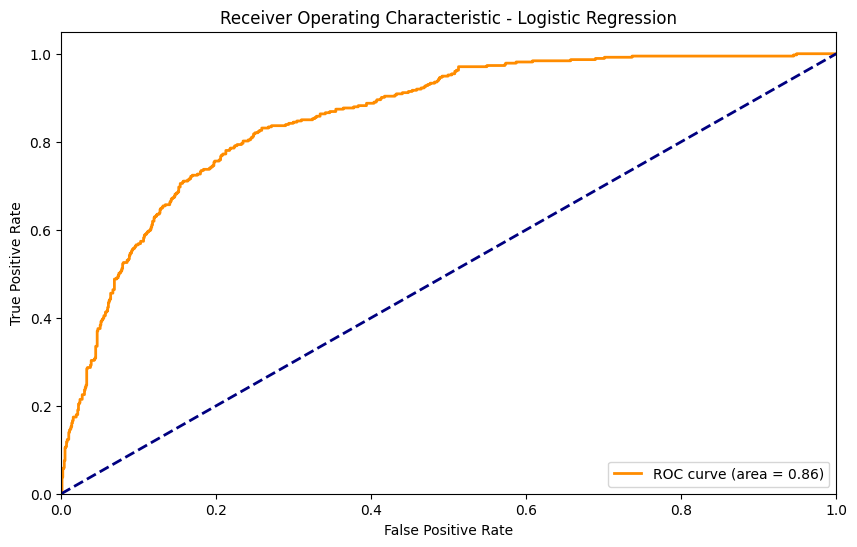

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, best_lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the Random Forest classifier with chosen hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1)

# Train the Random Forest classifier
rf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_rf))
print()

Random Forest:
Accuracy: 0.7679205110007097
Precision: 0.5415162454873647
Recall: 0.8042895442359249
F1 Score: 0.6472491909385113
ROC AUC Score: 0.7795578995310899



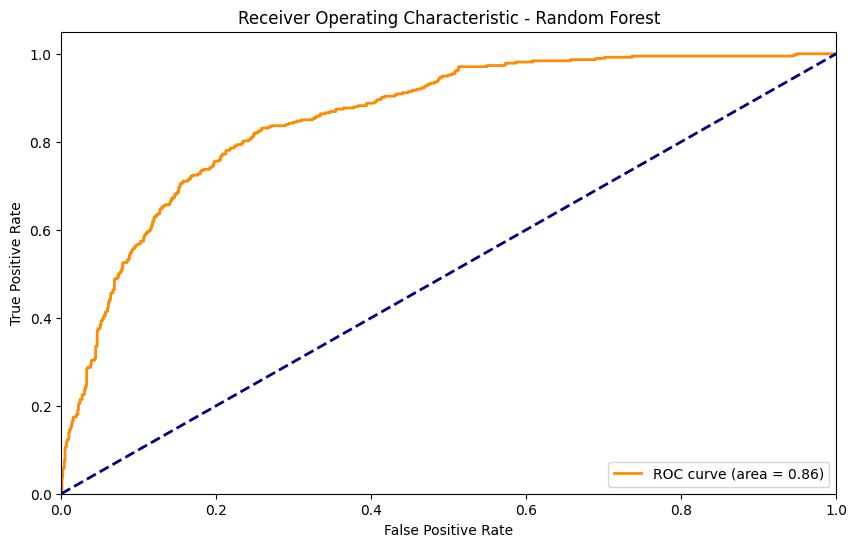

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Random Forest
fpr, tpr, _ = roc_curve(y_test, best_lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the Gradient Boosting classifier with chosen hyperparameters
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3)

# Train the Gradient Boosting classifier
gb.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate Gradient Boosting
print('Gradient Boosting:')
print('Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Precision:', precision_score(y_test, y_pred_gb))
print('Recall:', recall_score(y_test, y_pred_gb))
print('F1 Score:', f1_score(y_test, y_pred_gb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_gb))
print()

Gradient Boosting:
Accuracy: 0.7955997161107168
Precision: 0.5913978494623656
Recall: 0.7372654155495979
F1 Score: 0.6563245823389021
ROC AUC Score: 0.7769338660759573



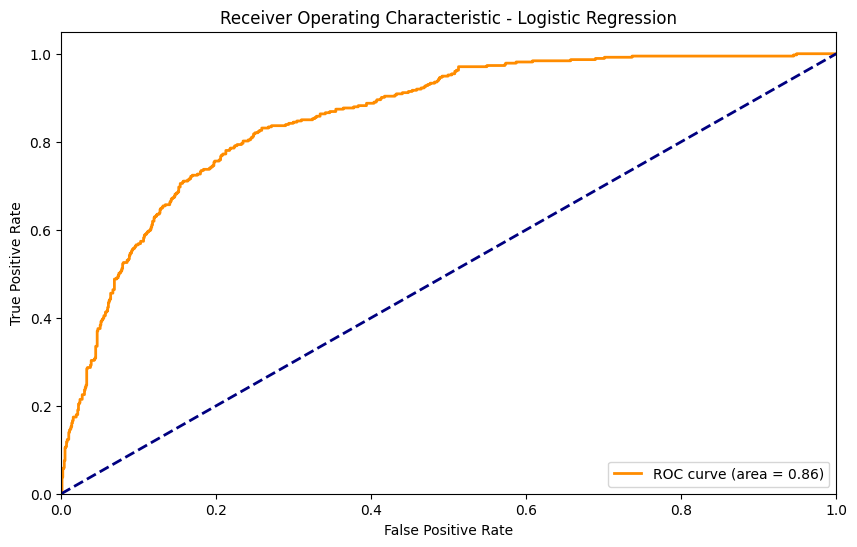

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, best_lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

**Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the SVM classifier with chosen hyperparameters
svm = SVC(C=1, gamma=0.1, kernel='rbf', probability=True)

# Train the SVM classifier
svm.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate SVM
print('SVM:')
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm))
print('Recall:', recall_score(y_test, y_pred_svm))
print('F1 Score:', f1_score(y_test, y_pred_svm))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_svm))
print()

SVM:
Accuracy: 0.7352732434350603
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


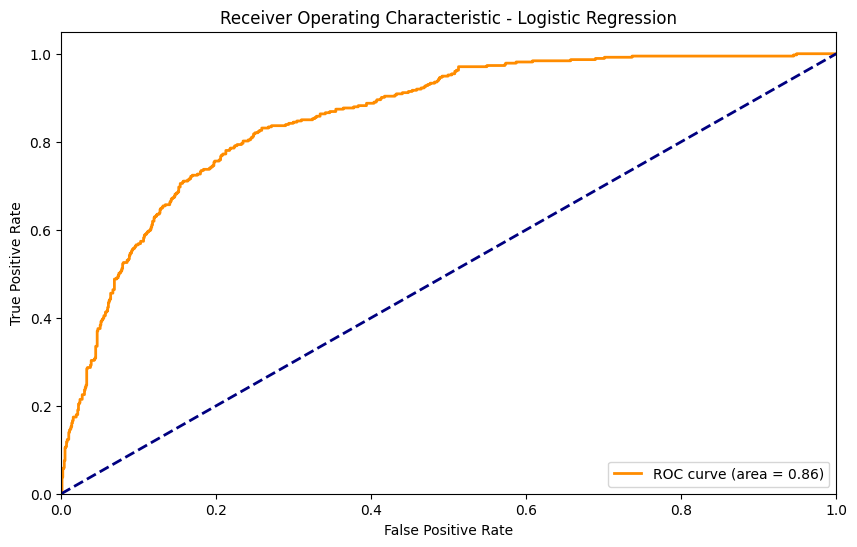

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, best_lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

**K-Nearest Neighbors (KNN)**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the KNN classifier with chosen hyperparameters
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Train the KNN classifier
knn.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
print('KNN:')
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn))
print('Recall:', recall_score(y_test, y_pred_knn))
print('F1 Score:', f1_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_knn))
print()

KNN:
Accuracy: 0.26472675656493966
Precision: 0.26472675656493966
Recall: 1.0
F1 Score: 0.4186307519640853
ROC AUC Score: 0.5



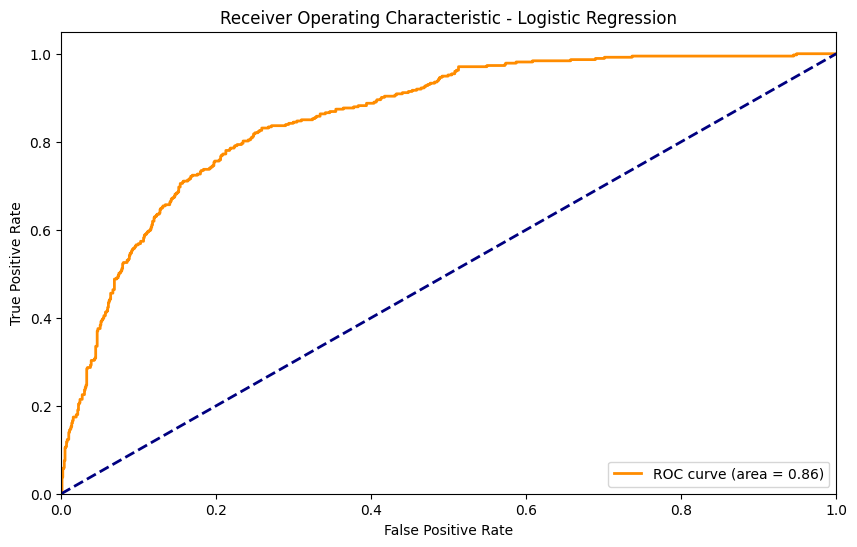

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, best_lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

**XGBoost**

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the XGBoost classifier with chosen hyperparameters
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the XGBoost classifier
xgb.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
print('XGBoost:')
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('Precision:', precision_score(y_test, y_pred_xgb))
print('Recall:', recall_score(y_test, y_pred_xgb))
print('F1 Score:', f1_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_xgb))
print()

XGBoost:
Accuracy: 0.8069552874378992
Precision: 0.6182669789227166
Recall: 0.707774798927614
F1 Score: 0.66
ROC AUC Score: 0.7752194457958533



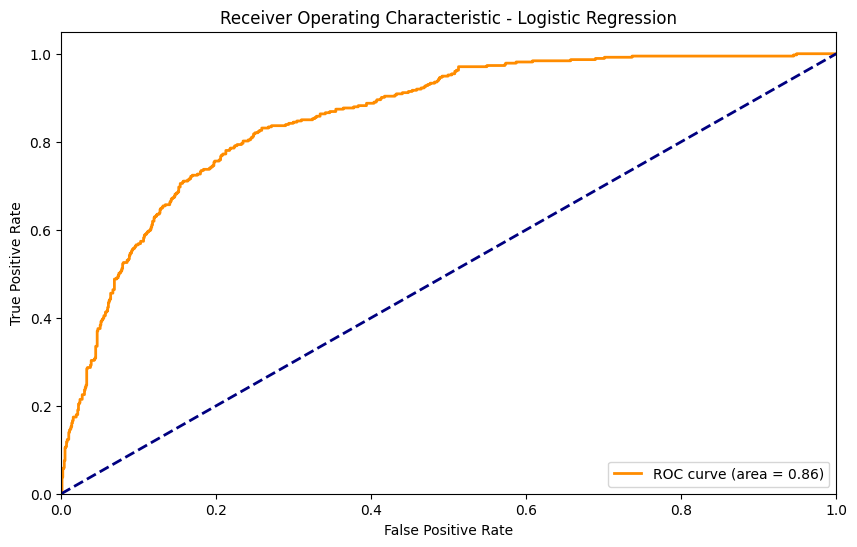

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, best_lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# **Step 6: Model Evaluation**

Logistic Regression Evaluation:
Accuracy: 0.8019872249822569
Precision: 0.719626168224299
Recall: 0.4128686327077748
F1 Score: 0.524701873935264
ROC AUC Score: 0.6774767873963585

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.94      0.87      1036
        True       0.72      0.41      0.52       373

    accuracy                           0.80      1409
   macro avg       0.77      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



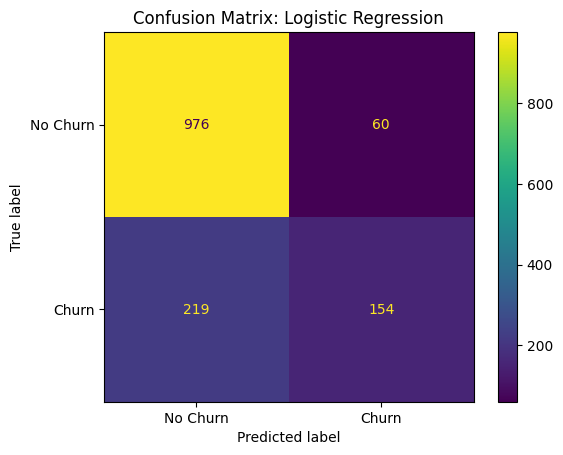

Random Forest Evaluation:
Accuracy: 0.7679205110007097
Precision: 0.5415162454873647
Recall: 0.8042895442359249
F1 Score: 0.6472491909385113
ROC AUC Score: 0.7795578995310899

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.75      0.83      1036
        True       0.54      0.80      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



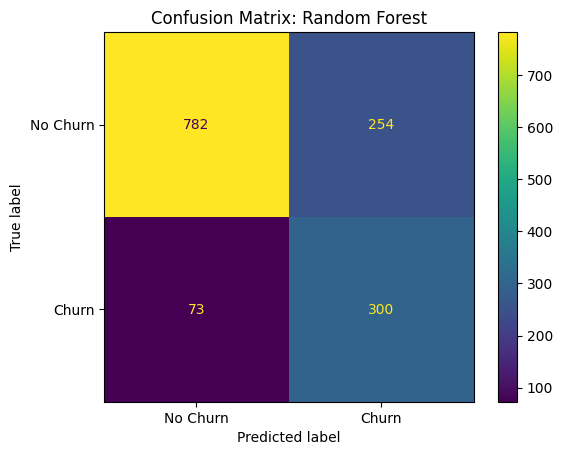

Gradient Boosting Evaluation:
Accuracy: 0.7955997161107168
Precision: 0.5913978494623656
Recall: 0.7372654155495979
F1 Score: 0.6563245823389021
ROC AUC Score: 0.7769338660759573

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.82      0.85      1036
        True       0.59      0.74      0.66       373

    accuracy                           0.80      1409
   macro avg       0.74      0.78      0.76      1409
weighted avg       0.82      0.80      0.80      1409



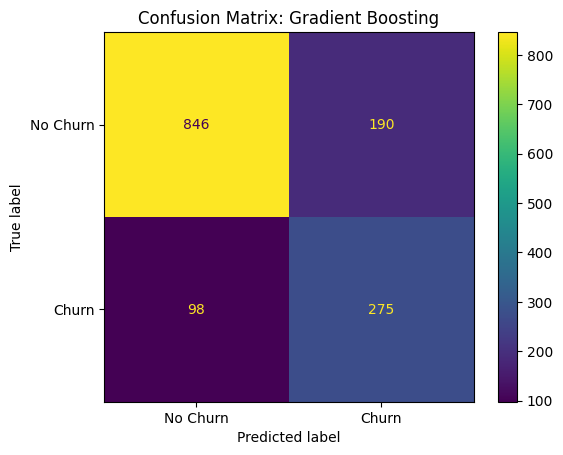

SVM Evaluation:
Accuracy: 0.7352732434350603
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5

Classification Report:
               precision    recall  f1-score   support

       False       0.74      1.00      0.85      1036
        True       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde

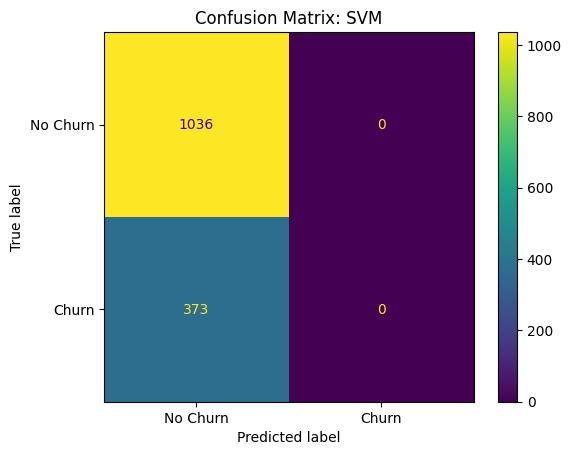

KNN Evaluation:
Accuracy: 0.26472675656493966
Precision: 0.26472675656493966
Recall: 1.0
F1 Score: 0.4186307519640853
ROC AUC Score: 0.5

Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00      1036
        True       0.26      1.00      0.42       373

    accuracy                           0.26      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.26      0.11      1409



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


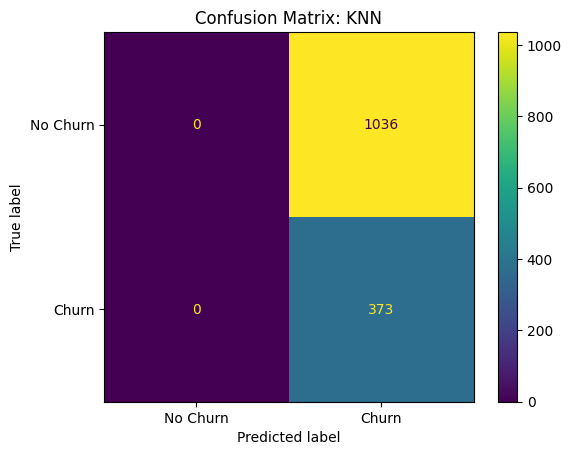

XGBoost Evaluation:
Accuracy: 0.8069552874378992
Precision: 0.6182669789227166
Recall: 0.707774798927614
F1 Score: 0.66
ROC AUC Score: 0.7752194457958533

Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.84      0.87      1036
        True       0.62      0.71      0.66       373

    accuracy                           0.81      1409
   macro avg       0.75      0.78      0.76      1409
weighted avg       0.82      0.81      0.81      1409



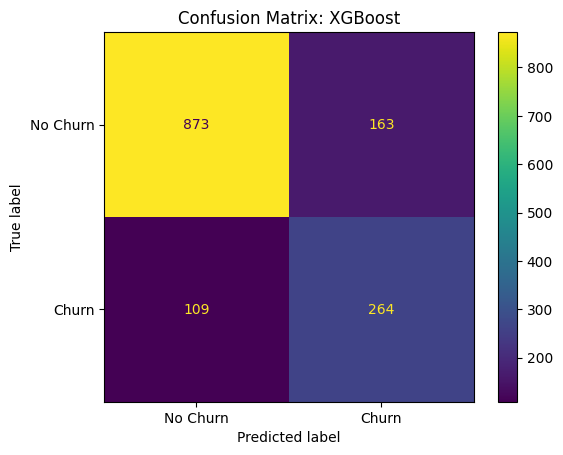

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Function to evaluate and plot confusion matrix
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f'{model_name} Evaluation:')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

    # Classification Report
    print(f'\nClassification Report:\n', classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
    disp.plot()
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Assuming best_lr, best_rf, best_gb, best_svm, best_knn, and best_xgb are already trained
# Evaluate Logistic Regression
evaluate_model(best_lr, X_test, y_test, 'Logistic Regression')

# Evaluate Random Forest
evaluate_model(rf, X_test, y_test, 'Random Forest')

# Evaluate Gradient Boosting
evaluate_model(gb, X_test, y_test, 'Gradient Boosting')

# Evaluate SVM
evaluate_model(svm, X_test, y_test, 'SVM')

# Evaluate KNN
evaluate_model(knn, X_test, y_test, 'KNN')

# Evaluate XGBoost
evaluate_model(xgb, X_test, y_test, 'XGBoost')

# **Additional Visualizations**

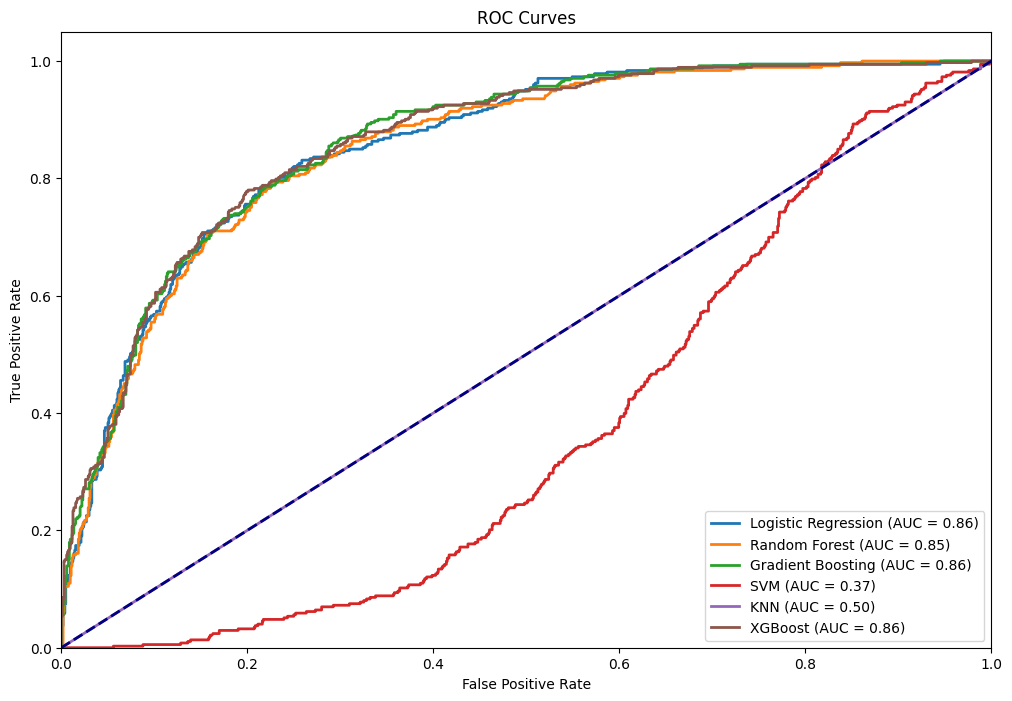

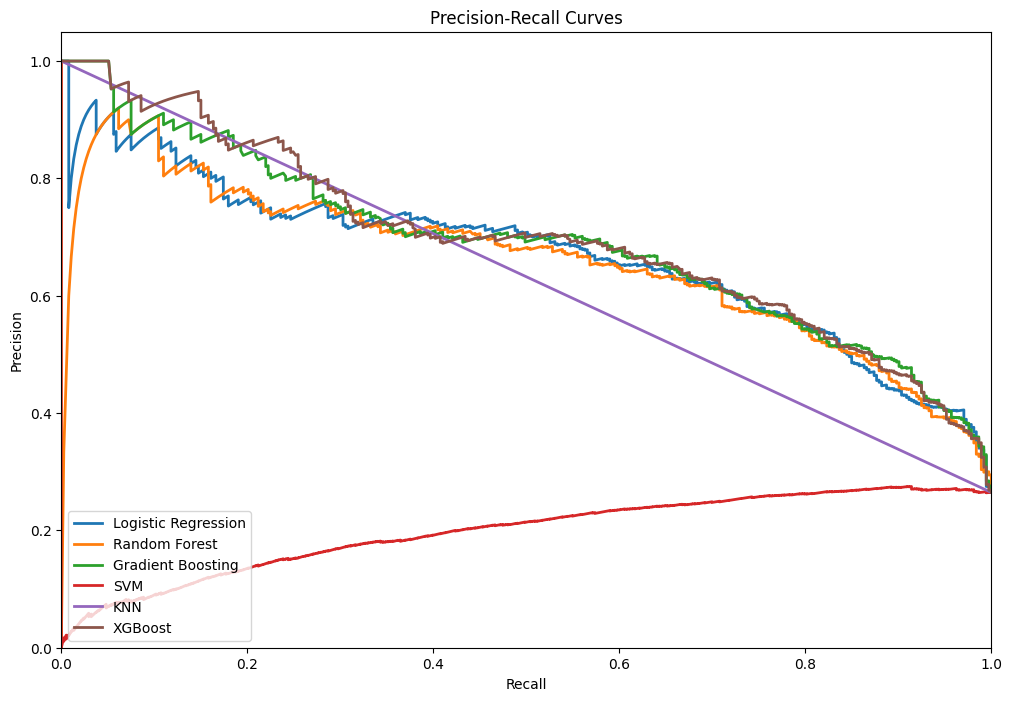

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


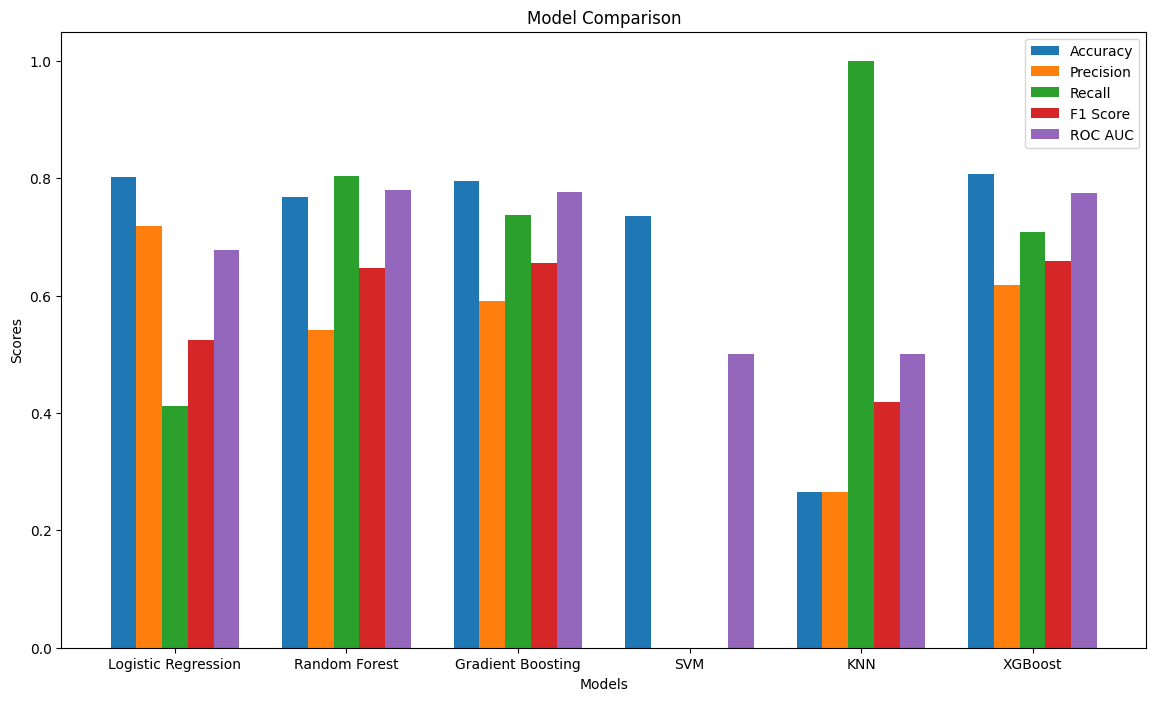

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Define a function to plot ROC curves for all models
def plot_roc_curves(models, model_names, X_test, y_test):
    plt.figure(figsize=(12, 8))
    for model, name in zip(models, model_names):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

# Define a function to plot precision-recall curves for all models
def plot_precision_recall_curves(models, model_names, X_test, y_test):
    plt.figure(figsize=(12, 8))
    for model, name in zip(models, model_names):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, lw=2, label=f'{name}')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc="lower left")
    plt.show()

# Define a function to calculate and plot bar plots for various metrics
def plot_metrics(models, model_names, X_test, y_test):
    metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': []}
    for model in models:
        y_pred = model.predict(X_test)
        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred))
        metrics['Recall'].append(recall_score(y_test, y_pred))
        metrics['F1 Score'].append(f1_score(y_test, y_pred))
        metrics['ROC AUC'].append(roc_auc_score(y_test, y_pred))

    x = np.arange(len(model_names))
    width = 0.15

    plt.figure(figsize=(14, 8))

    for i, (metric_name, values) in enumerate(metrics.items()):
        plt.bar(x + i * width, values, width, label=metric_name)

    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title('Model Comparison')
    plt.xticks(x + width * 2, model_names)
    plt.legend(loc='best')
    plt.show()

# Assuming best_lr, best_rf, best_gb, best_svm, best_knn, and best_xgb are already trained
models = [best_lr, rf, gb, svm, knn, xgb]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'XGBoost']

# Plot ROC curves for all models
plot_roc_curves(models, model_names, X_test, y_test)

# Plot precision-recall curves for all models
plot_precision_recall_curves(models, model_names, X_test, y_test)

# Plot bar plots for various metrics
plot_metrics(models, model_names, X_test, y_test)

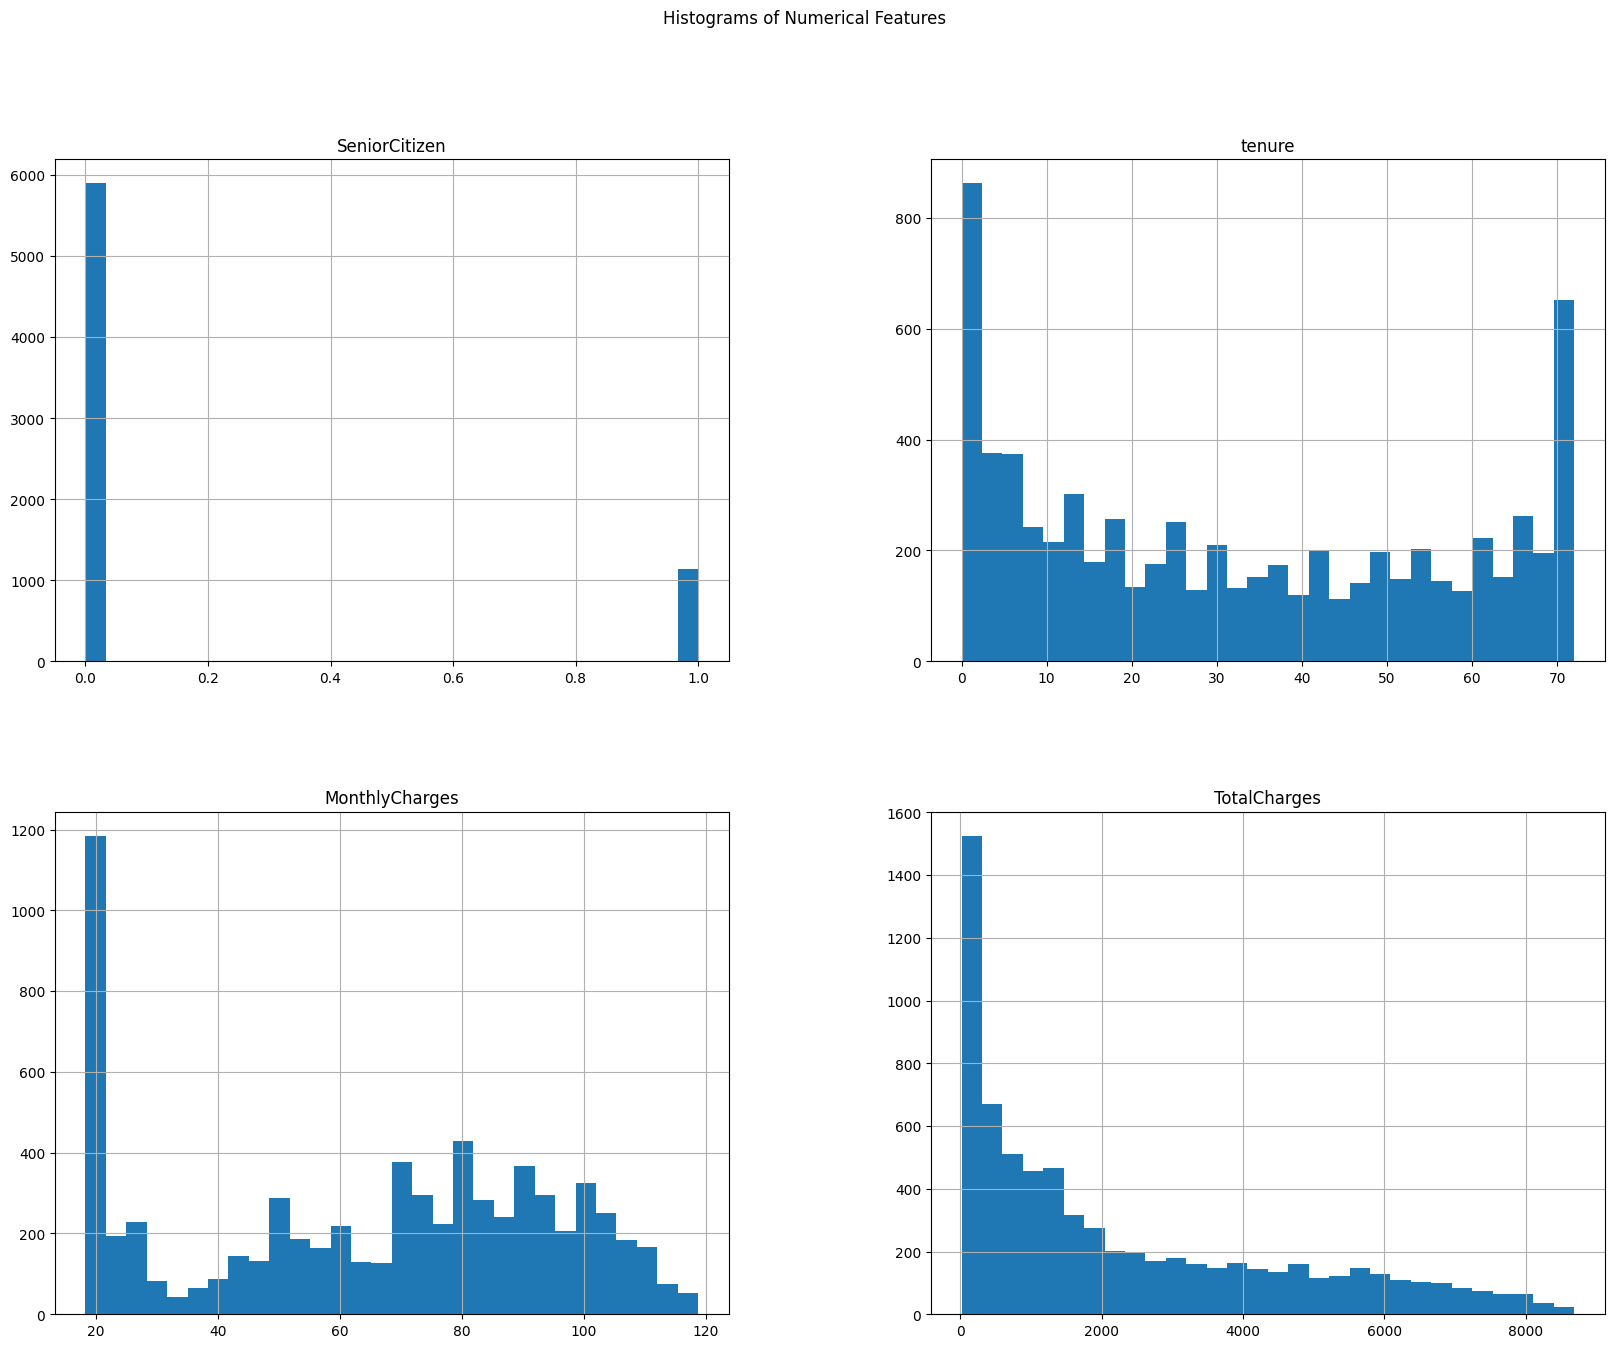

In [30]:
# Histograms of numerical features
data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

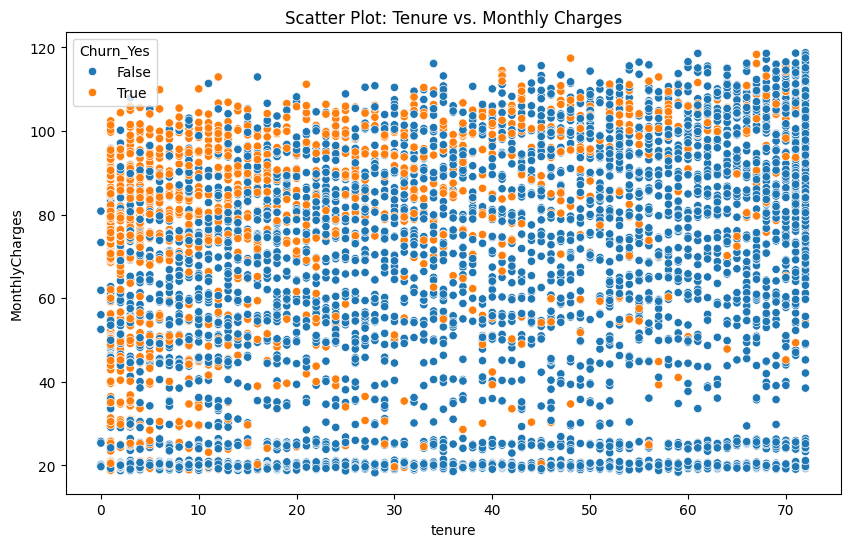

In [34]:
!pip install seaborn
import seaborn as sns
# Scatter plots
# Scatter plot for tenure vs. MonthlyCharges, colored by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn_Yes', data=data)
plt.title('Scatter Plot: Tenure vs. Monthly Charges')
plt.show()

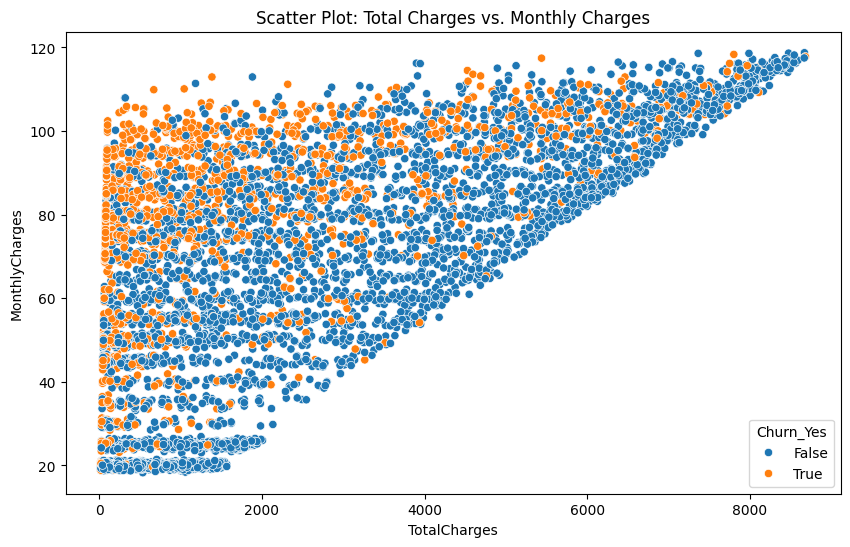

In [35]:
# 1. Scatter plot for TotalCharges vs. MonthlyCharges, colored by Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='MonthlyCharges', hue='Churn_Yes', data=data)
plt.title('Scatter Plot: Total Charges vs. Monthly Charges')
plt.show()

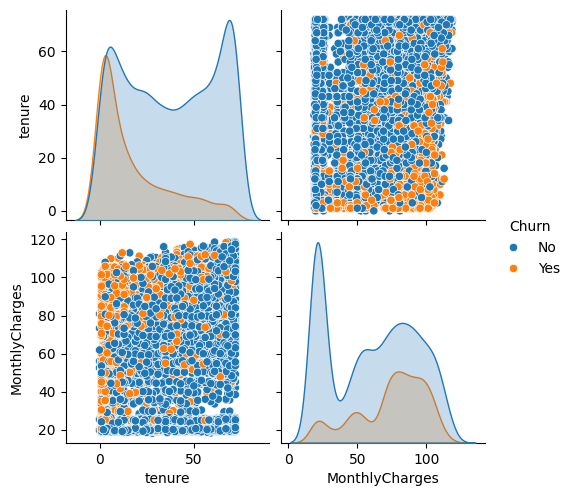

In [4]:
# 2. Scatter Plot Matrix
# Only plot numerical features to avoid cluttering
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(data[numerical_features + ['Churn']], hue='Churn', diag_kind='kde')
plt.show()

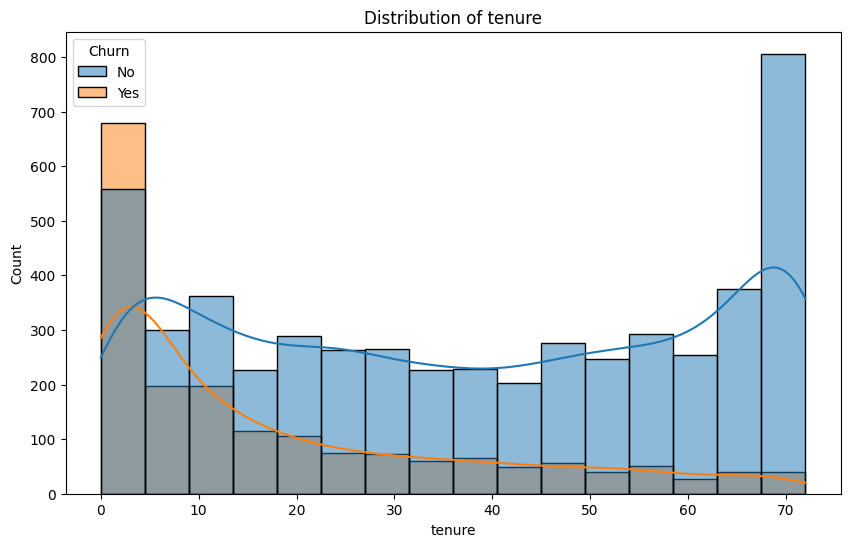

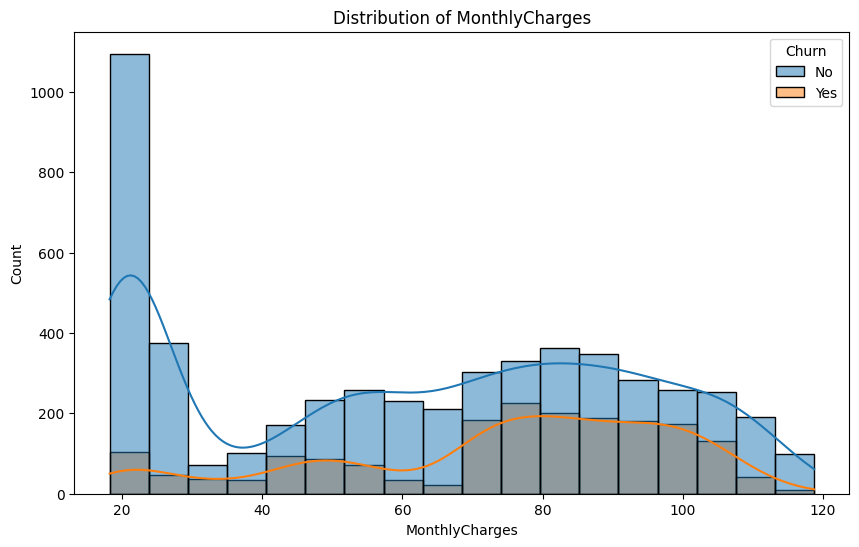

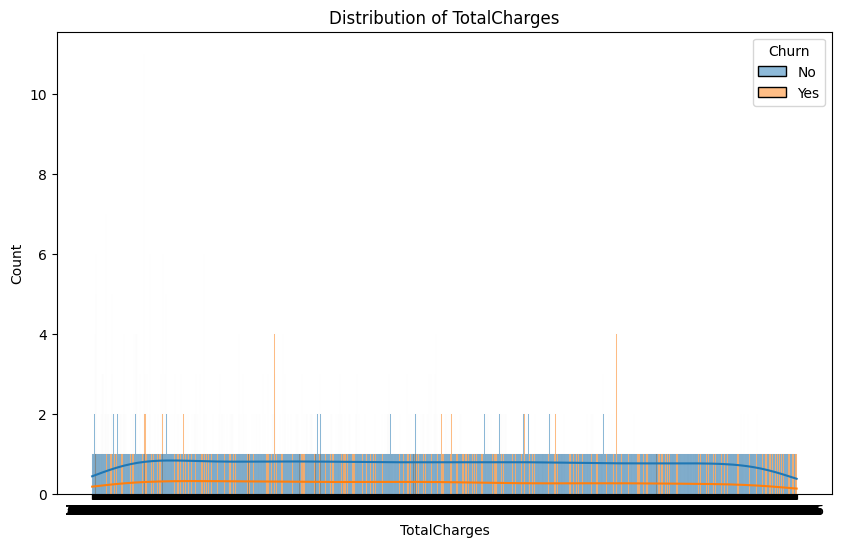

In [5]:
# 3. Distribution of Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='Churn', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

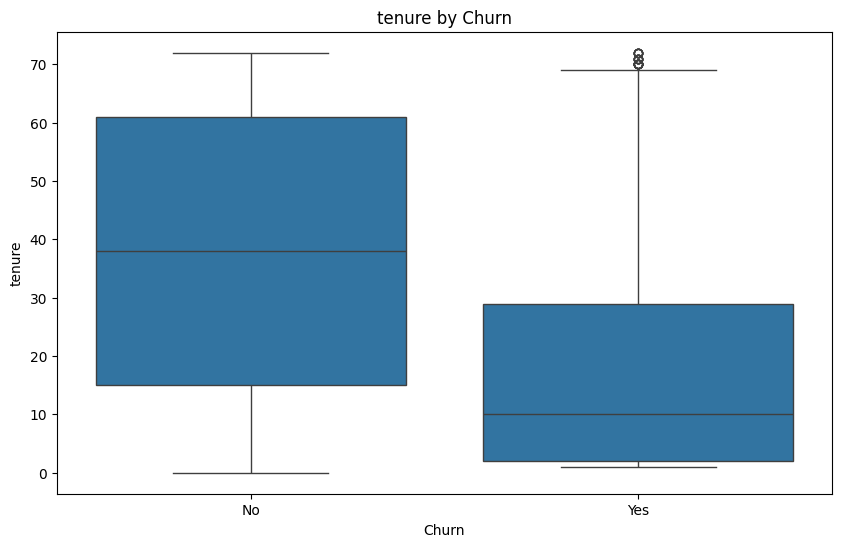

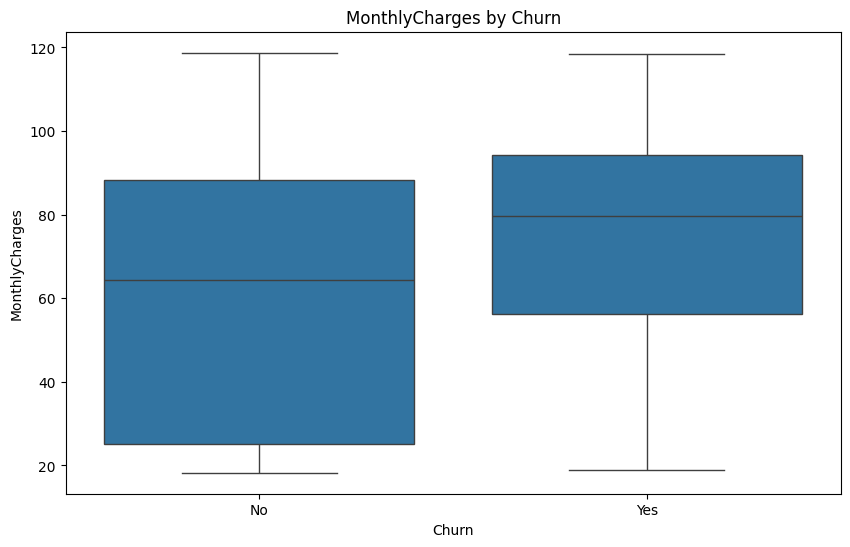

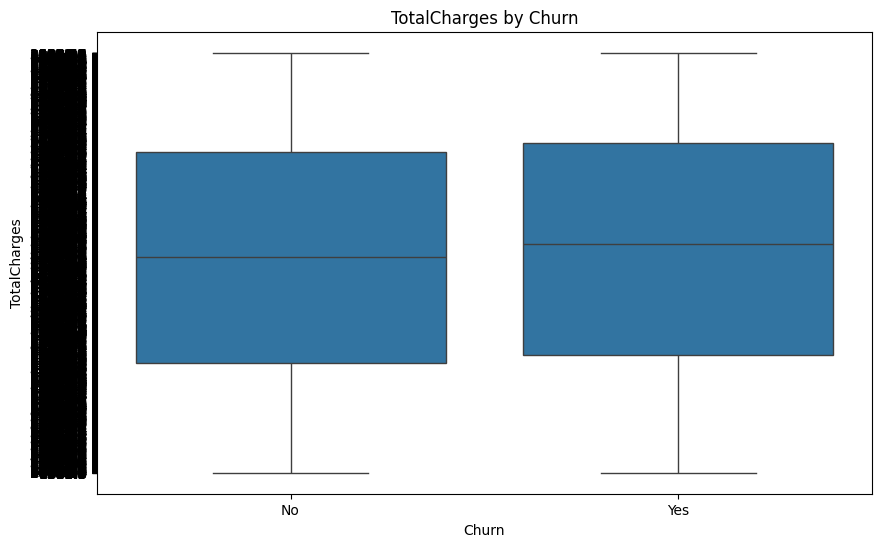

In [6]:
# 4. Box Plots for Numerical Features by Churn
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=data)
    plt.title(f'{feature} by Churn')
    plt.show()

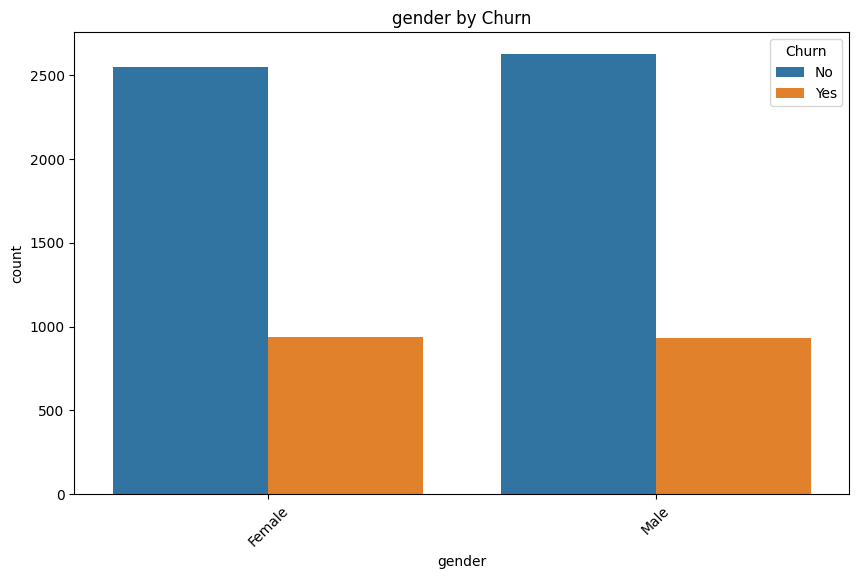

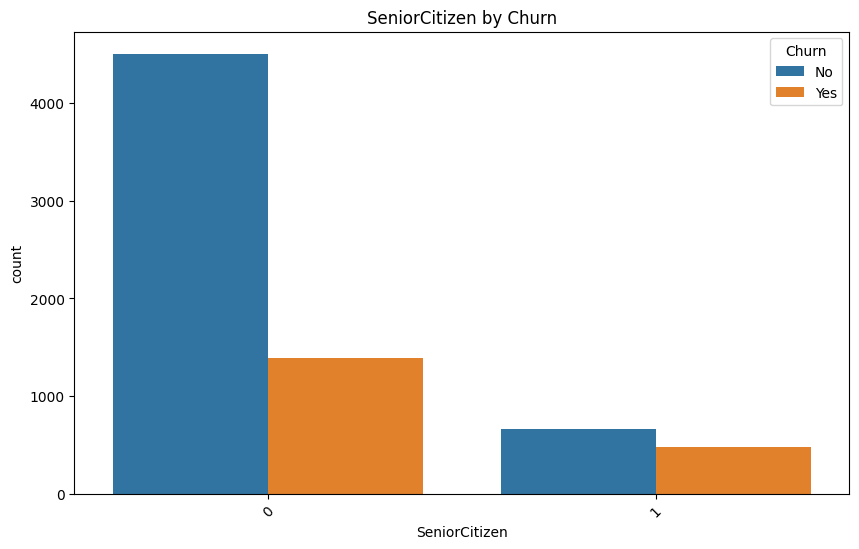

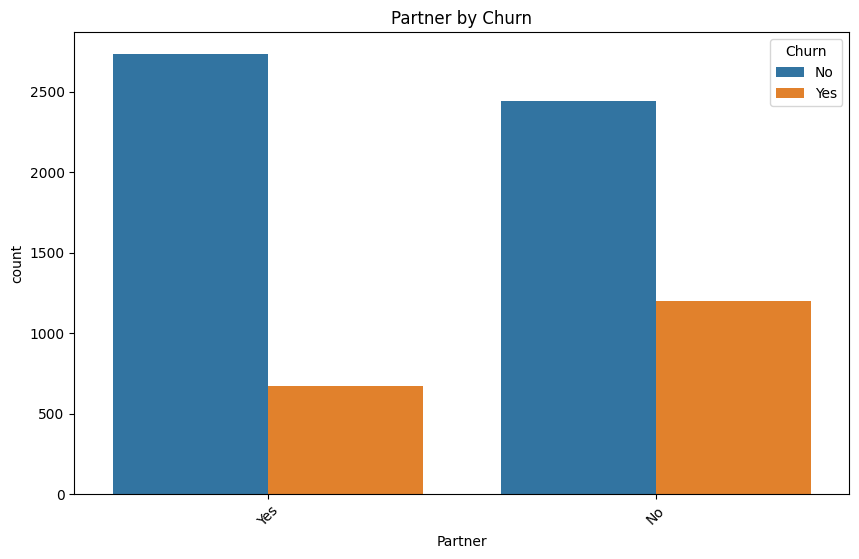

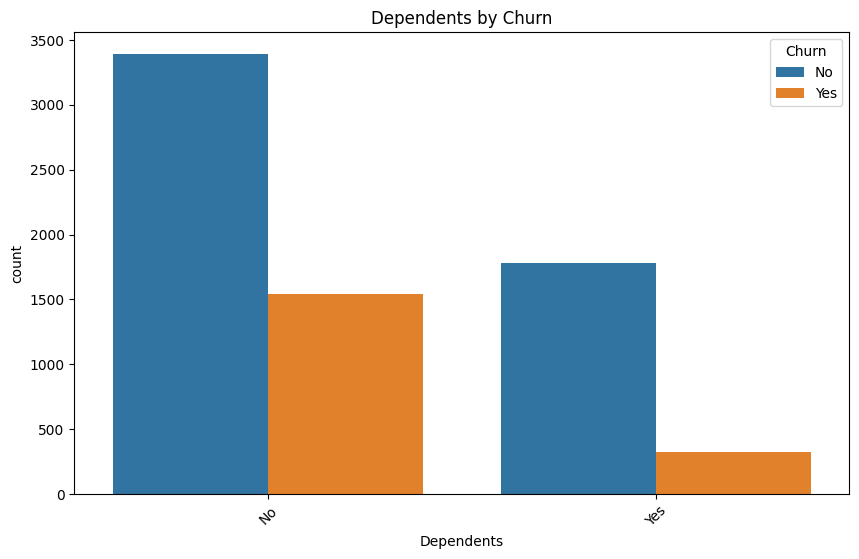

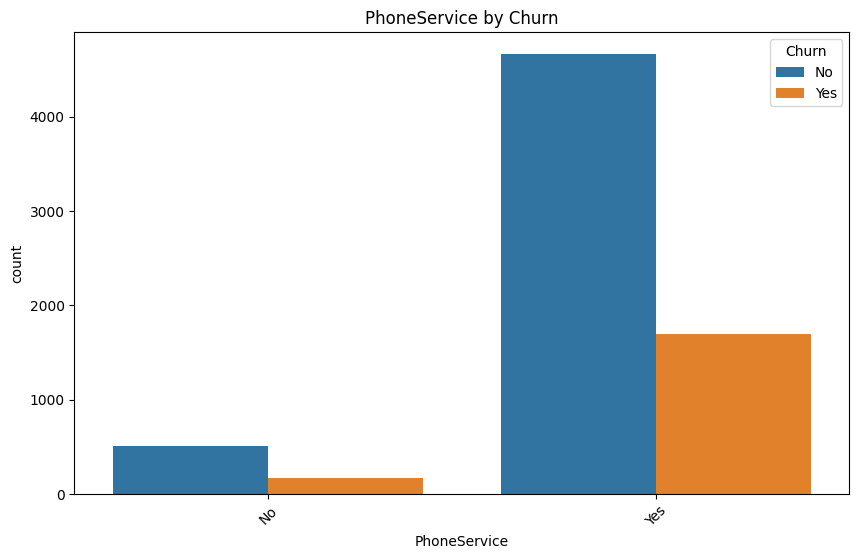

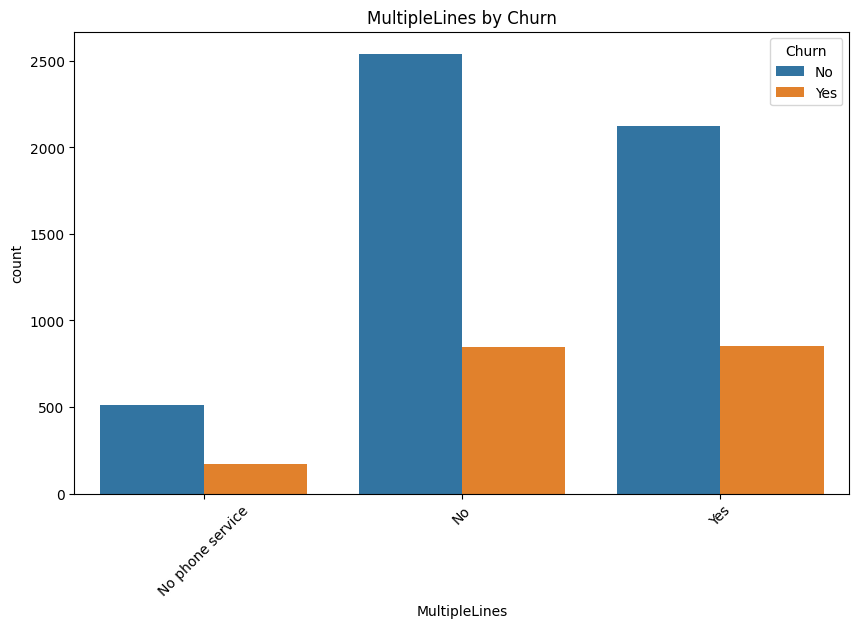

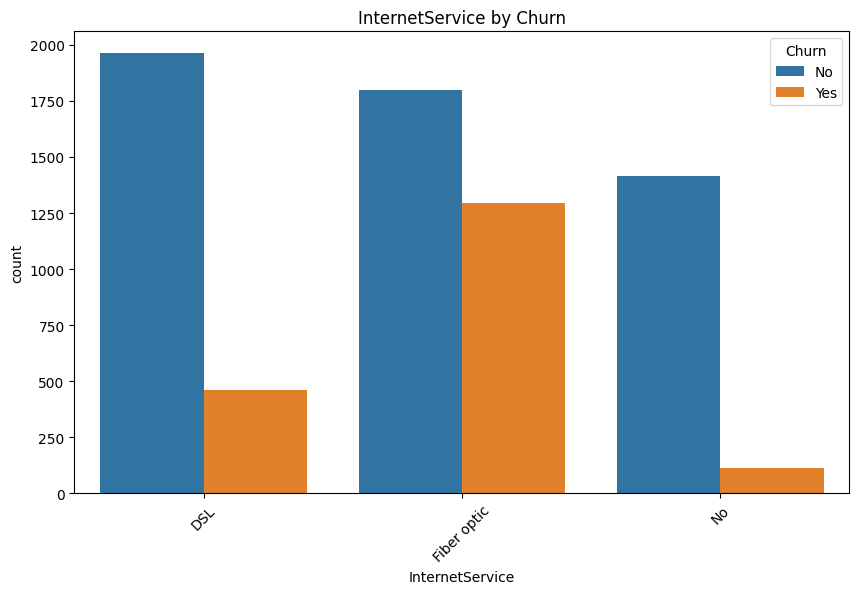

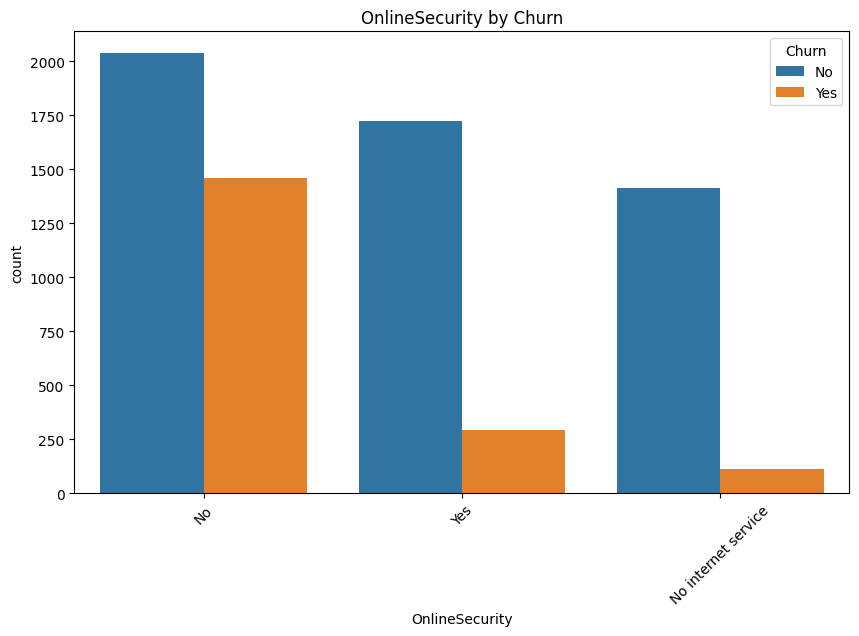

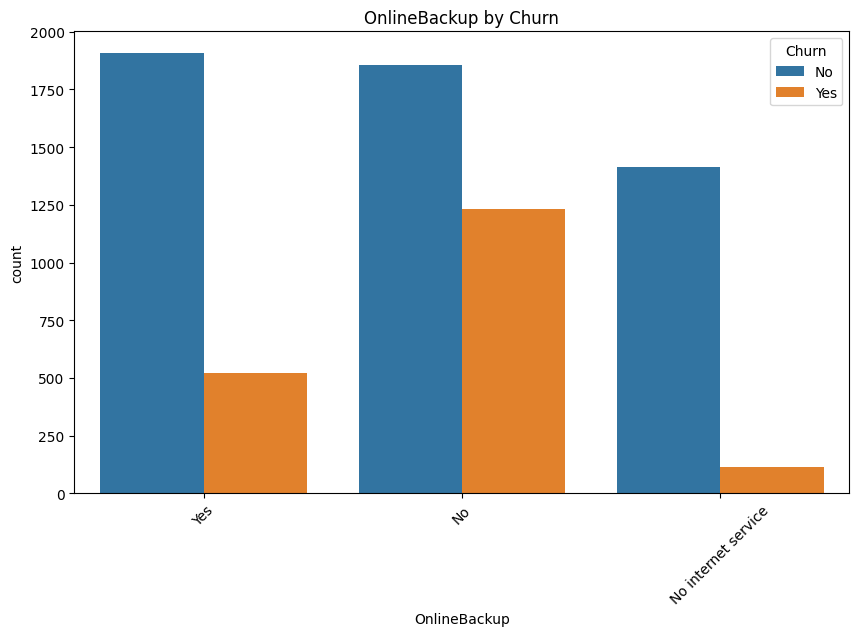

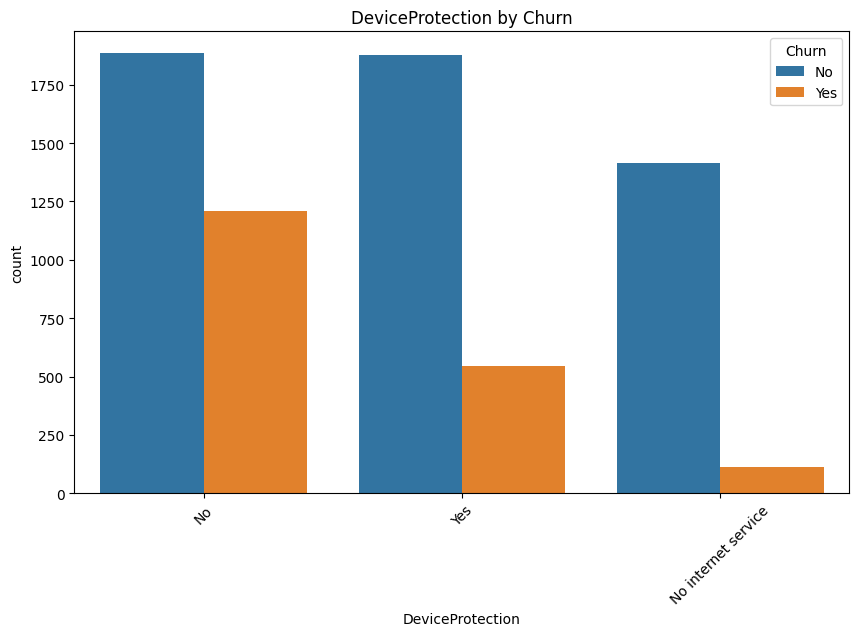

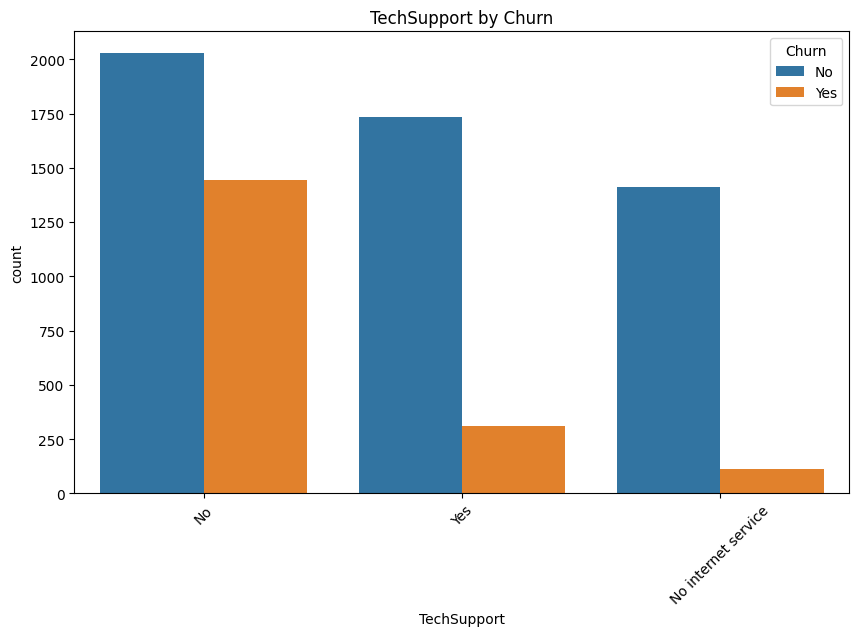

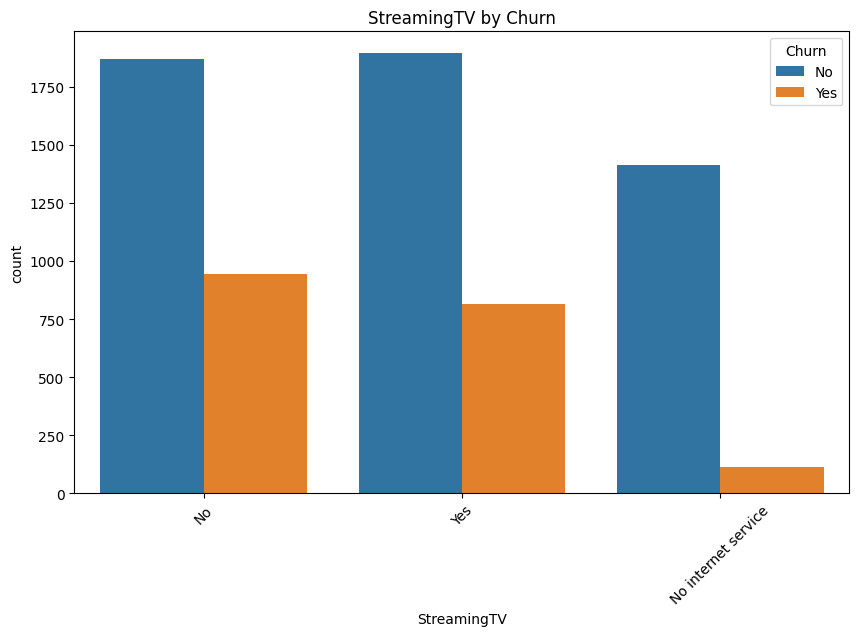

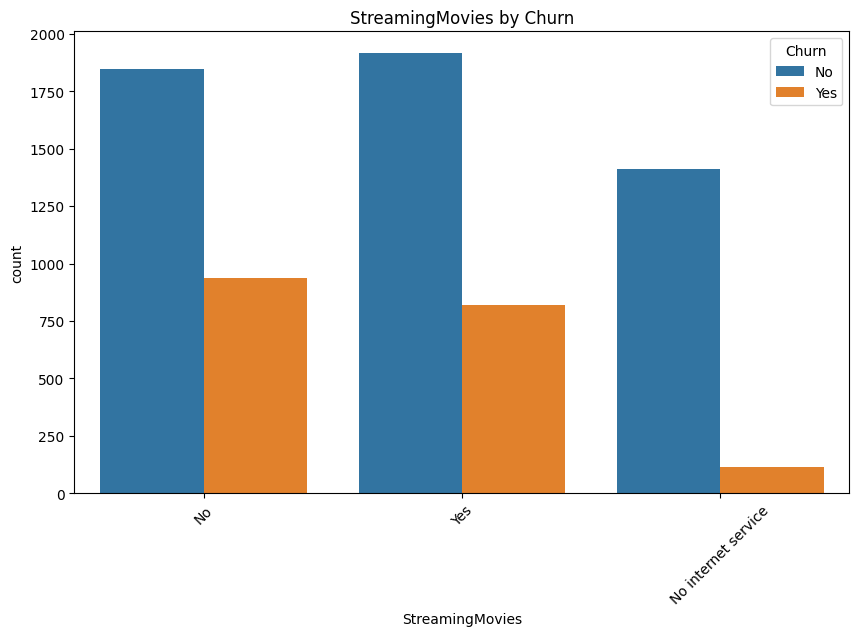

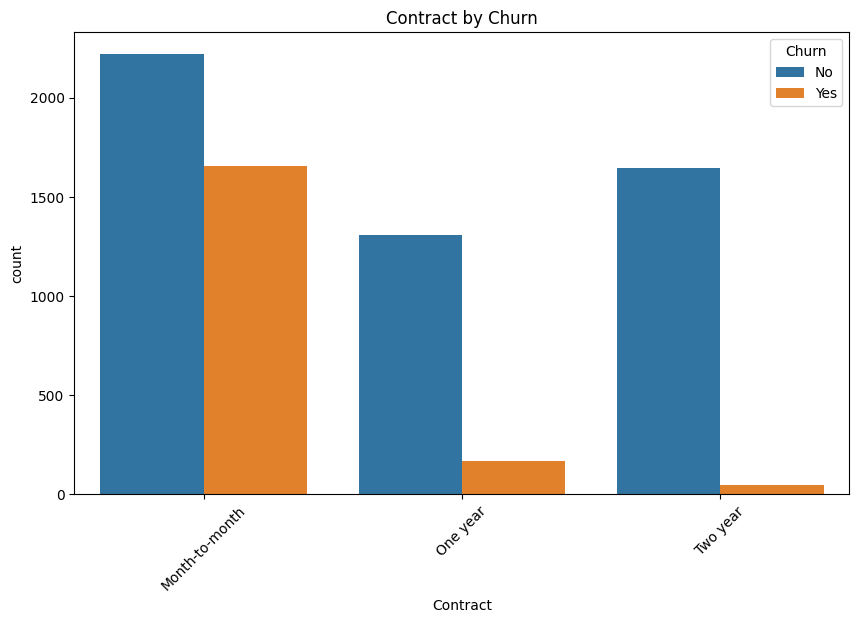

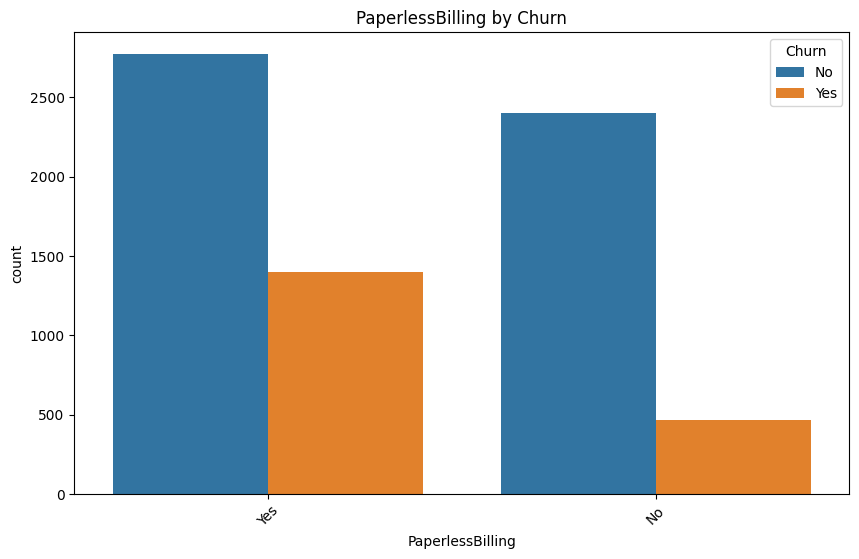

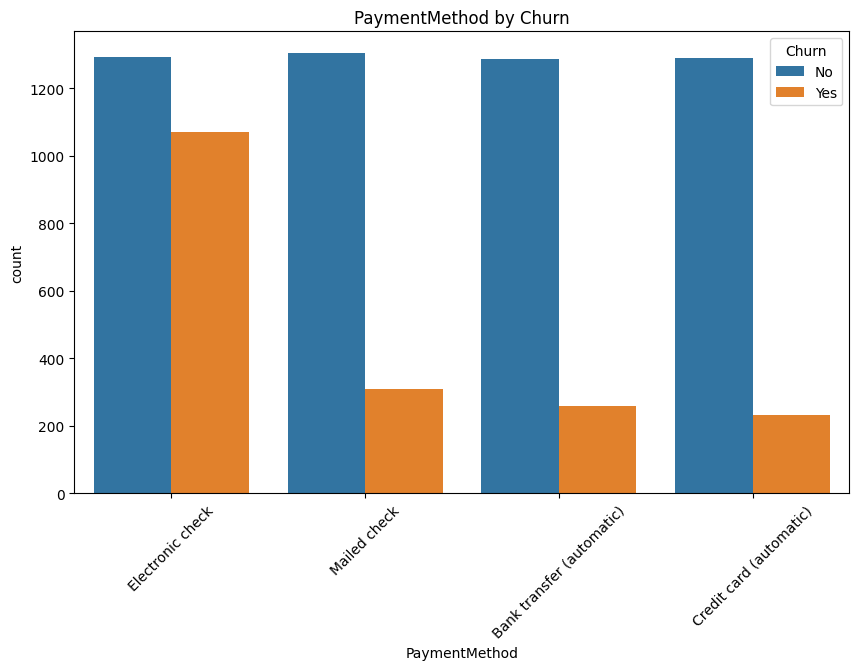

In [7]:
# 5. Count Plots for Categorical Features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.title(f'{feature} by Churn')
    plt.xticks(rotation=45)
    plt.show()